In [2]:
# 1. The independent variable is the word condition (congruent vs. incongruent) and the dependent variable
# is the amount of time taken to perform the test

In [3]:
# 2. An appropriate null hypothesis is that the condition has no impact on the 
#time required for the test, i.e. congruent vs. incongruent does not affect the time taken. 
#In this case, the alternate hypothesis would be that the condition does have an impact on 
#the time taken during the test. The null hypothesis could also be stated as: "the mean time
#required to perform the stroop task under the congruent condition is the same as the mean time
#required to perform it under the incongruent condition." With this wording, the alternate
#hypothesis would be that the mean time taken under the two conditions is not the same.

#Alternatively, we could use directional hypotheses and say the null hypothesis is that the
#the time taken given the congruent condition is more than the incongruent condition and the 
#alternate hypothesis is that the congruent condition takes less time than the incongruent
#condition.

#We could do a dependent T-test on the difference in times between the two 
#data conditions: congruent vs. incongruent.


In [2]:
#I've copied the dataset into my own github repo, so 
#we load it from there for further examination
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/trtg/udacity_data_analysis_p1/master/stroop_data.csv')

#Here are some descriptive statistics for the data set
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [8]:
#We can see that the mean time taken in the congruent
#condition is less than that in the incongruent condition
#and there is less variability in the congruent condition
#(i.e. the STD is lower). The open question now is whether
#the mean time in the congruent condition is significantly lower
#than the mean time in the incongruent condition

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


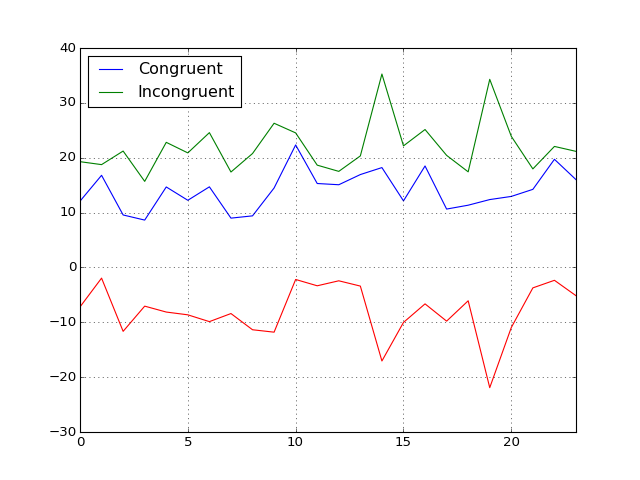

In [3]:
%pylab notebook
data.plot()
# 4. Note in the plot below that for every single participant, their 
#time under the congruent condition is less than their time under the incongruent condition

In [23]:
difference = data['Congruent']-data['Incongruent']

In [24]:
#Here we compute the standard deviation of the 
#differences in time between the two conditions.
#Specifying ddof=1 causes a denominator of (n-1)
#to be used
S = difference.std(ddof=1)
print S

4.86482691036


In [11]:
x_congruent = data['Congruent'].mean()
x_incongruent = data['Incongruent'].mean()
n = len(data)
#our point estimate for mu_congruent - mu_incongruent is:
x_congruent-x_incongruent

-7.9647916666666667

In [13]:
#t = (mu_congruent - mu_incongruent)/(S/sqrt(n))
t = (x_congruent - x_incongruent)/(S/(n**.5))

In [16]:
print t

-8.02070694411


In [17]:
# 5. T critical values assuming a 95% confidence interval are +- 2.064
#our value of T computed above is well beyond that. For 23 degrees
#of freedom (since n=24), a T-score of 8.02 is off the charts, so our confidence
#level is better than 99.9%. We reject the null in this case. This result agrees with
#my suspicion that the incongruent condition would be much more difficult/slow
#than the congruent condition.

In [ ]:
# 6. I suspect the delay observed in the incongruent condition is due to the cognitive
#interference caused by the Stroop task. Experiment participants are being asked
#to deal with two competing stimuli and resolving the conflict between the two requires
#thought and thus additional time. Another task which might yield similar results would be
#flash cards with numbers printed on them of unequal size. In the congruent condition, the
#numerically larger value would also be printed physically larger, i.e. 7 is bigger than 2.
#In the incongruent condition, the numerically smaller value is printed larger than 
#the numerically larger value, i.e. 2 is bigger than 7. If a subject is then asked which 
#number is "bigger" they might respond more slowly in the incongruent condition.